___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [ ]:
ad_data = pd.read_csv('/content/drive/MyDrive/Logistic _ Linear regression Exercise/advertising.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ad_data=pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**


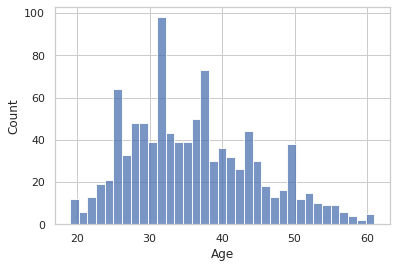

In [ ]:
sns.histplot(ad_data['Age'],bins=35)

**Create a jointplot showing Area Income versus Age.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


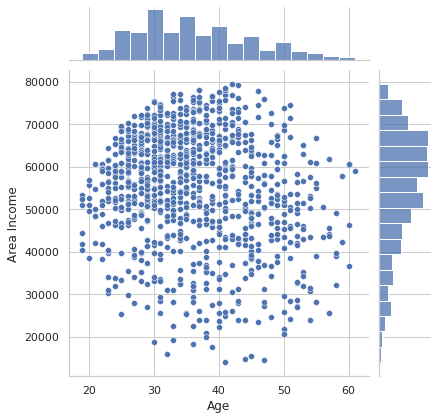

In [ ]:
sns.jointplot(ad_data['Age'],ad_data['Area Income'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


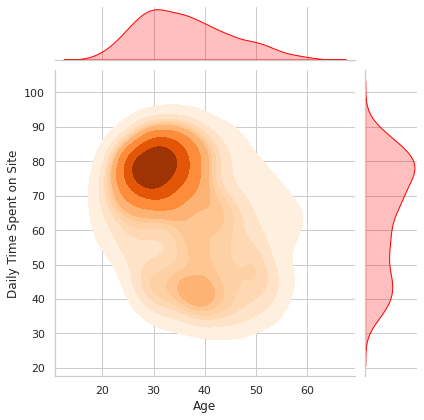

In [ ]:
sns.jointplot(ad_data['Age'],ad_data['Daily Time Spent on Site'],kind='kde',color='red',cmap='Oranges',fill=True)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

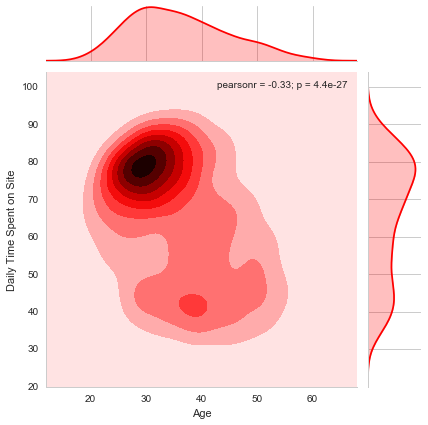

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


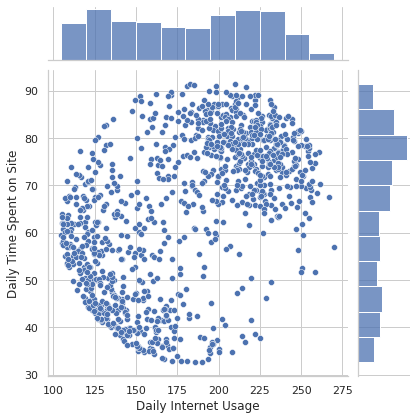

In [ ]:
sns.jointplot(ad_data['Daily Internet Usage'],ad_data['Daily Time Spent on Site'])

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

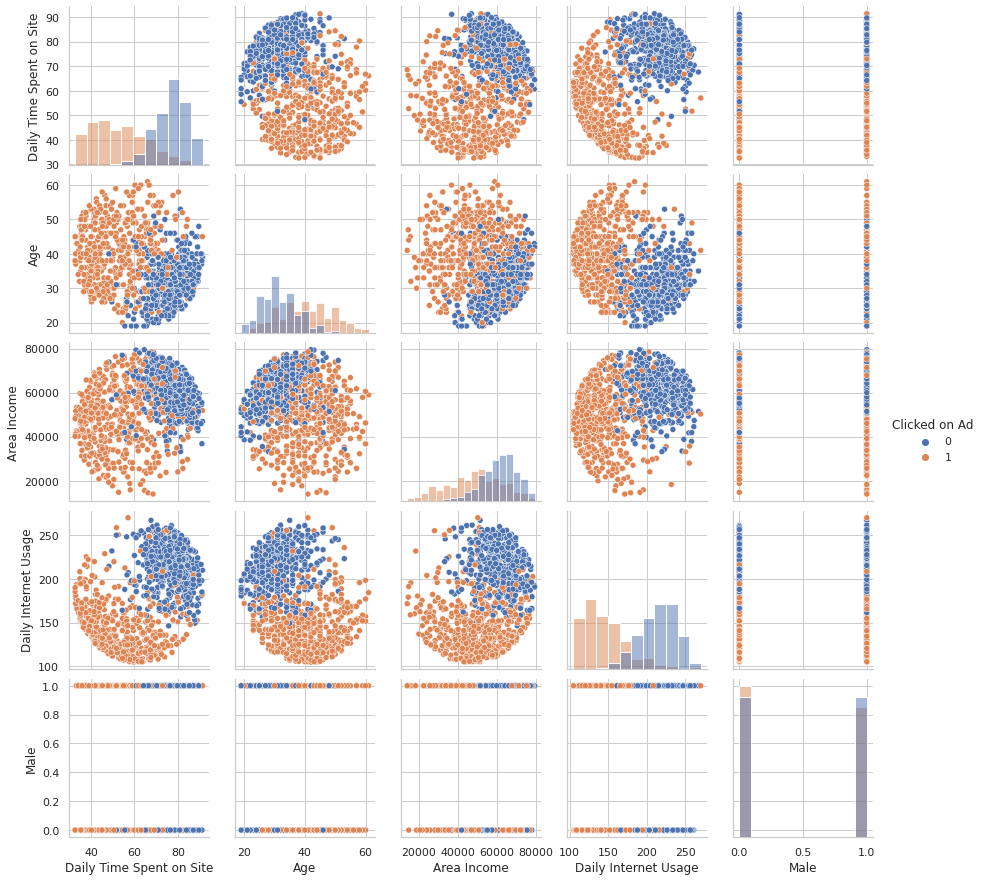

In [ ]:
sns.pairplot(ad_data,hue='Clicked on Ad',kind='scatter',diag_kind='hist')

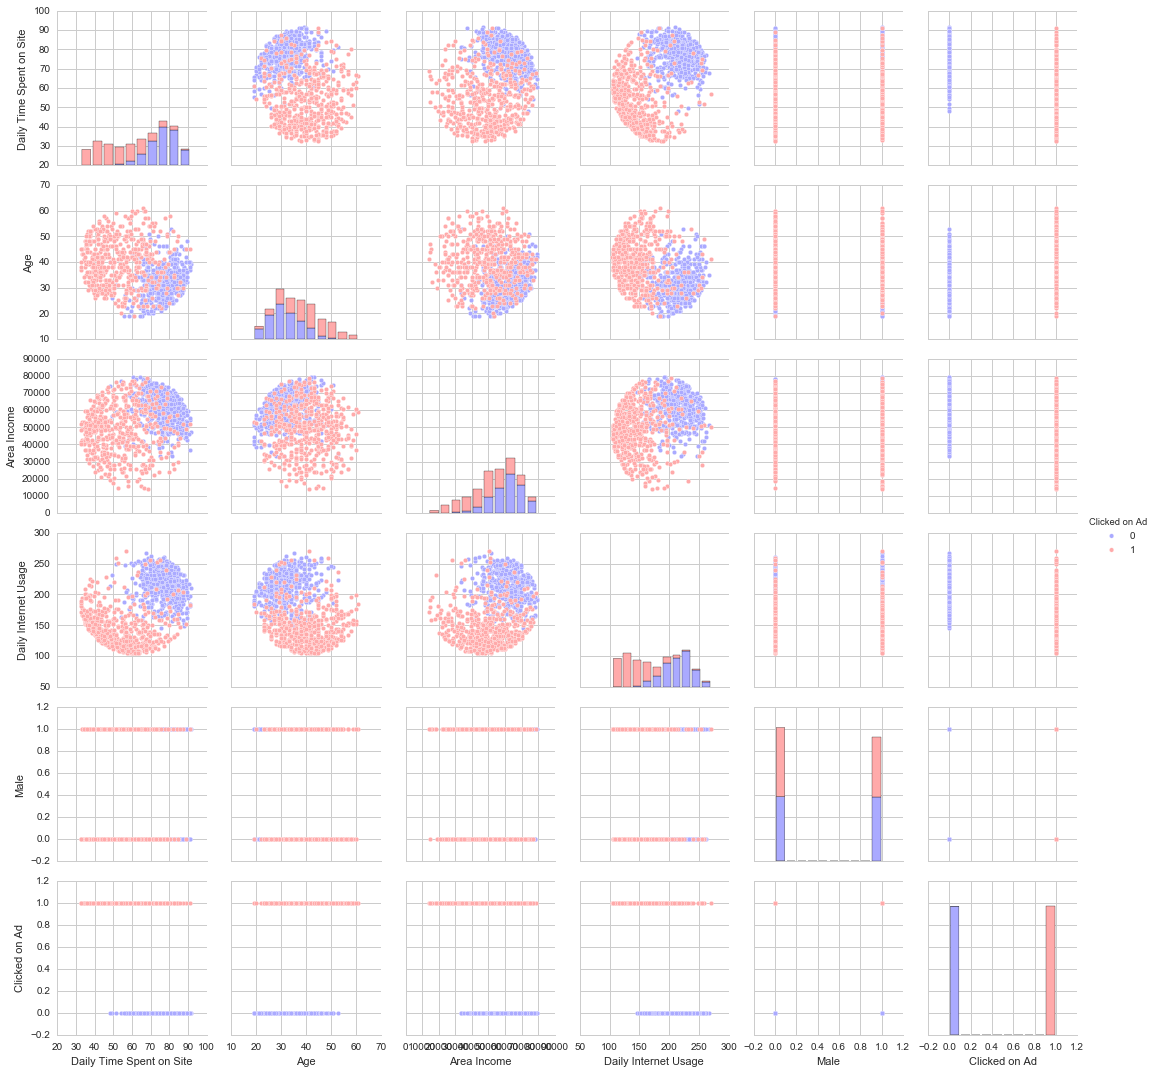

In [ ]:
s

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

Get all the column names/titles

In [ ]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

Inspect the categorical data #city,#country,#Ad topics,#timeStamps to determine if they will be necessary in the model. If they can be categorized or grouped and they are correlated to our target they will be included in the model.

In [ ]:
len(ad_data['Country'].unique()) #nwith 237 unique value found, categorization is possible it will however lead to unnecesary complexity in the model.

237

In [ ]:
len(ad_data['City'].unique()) #969 non unique value found, categorization is impossible

969

In [ ]:
len(ad_data['Timestamp'].unique()) #no unique value found, categorization is impossible


1000

In [ ]:
len(ad_data['Ad Topic Line'].unique()) #no unique value found, categorization is impossible

1000

**Since all the categorical data are entirely unique, they will have no effect on the model** ***and will therefore be ignored***

*hence, no need to create dummies for them*



In [ ]:
#data=pd.get_dummies(ad_data)

** Split the data into training set and testing set using train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split as tts #import split function

*THE pairplot shows that the **gender** has no reasonable effect on the target, it will therefore be dropped*


In [ ]:
X=ad_data.iloc[:,0:4].values
Y=ad_data.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=tts(X,Y, random_state=0,test_size=0.33)

In [ ]:
#import logistic regression model

from sklearn.linear_model import LogisticRegression as LR

In [ ]:
# instantiate the model
model=LR()

** Train and fit a logistic regression model on the training set.**

In [ ]:
model=model.fit(x_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [ ]:
yhat=model.predict(x_test)

** Create a classification report for the model.**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix=confusion_matrix(y_test,yhat)
matrix

array([[169,  10],
       [ 17, 134]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report= classification_report(y_test,yhat)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       179
           1       0.93      0.89      0.91       151

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



## Great Job!